In [189]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

In [190]:
"############### Parâmetros fixos ##############"

"############### chute inicial de temp. ##############"

T_f_ent_1 = 28 + 273.15
T_f_sai_chut_1 =  700 + 273.15 
T_f_sai_chut_5 = (T_f_sai_chut_1 - T_f_ent_1)/2 + T_f_ent_1
T_f_sai_chut_6 = T_f_sai_chut_1

T_q_ent_2 = 665 + 273.15
T_q_sai_chut_2 =  50 + 273.15
T_q_sai_chut_4 = (T_q_sai_chut_2 - T_q_ent_2)/3 + T_q_ent_2
T_q_sai_chut_5 = 2*(T_q_sai_chut_2 - T_q_ent_2)/3 + T_q_ent_2
T_q_sai_chut_6 = T_q_sai_chut_2

"############### chute inicial de comprimentos. ##############"

L_chut_5 = 0.6

#d_i_eval = np.linspace(8**(-3),10**(-3),num=5)


"############### parametros do trocador ##############"

L = 2
D = 76e-3
n_tubos = 19
P_T = 15e-3
B_chi = L / 8
d_i = 10e-3
d_e = d_i + 2.5e-3
A_i = np.pi * d_i * L * n_tubos
A_e = np.pi * d_e * L * n_tubos
A_i_L = np.pi * d_i * n_tubos
A_e_L = np.pi * d_e * n_tubos
P_e_m = np.pi * d_e
A_i_t = (np.pi * d_i**2)/4
A_c_t = np.pi * D**2/4
k_aco = 401

"############### parâmetros de entrada dos flúidos ##############"

m_dot_f_eval = np.linspace(0.0000045,0.00000501,num=100)
m_dot_q = 0.0016
P_q = 101325
P_f = 101325

In [191]:
"############### Volumes de Controle IV.V.VI ##############"

"parametros do fluido quente"

T_q_ent_kern = T_q_ent_2
T_med_q_kern = (T_q_ent_kern + T_q_sai_chut_5)/2
mu_q_kern = PropsSI('viscosity','P',P_q,'T',T_med_q_kern,'air')
Pr_q_kern = PropsSI('Prandtl','P',P_q,'T',T_med_q_kern,'air')
k_q_kern = PropsSI('conductivity','P',P_q,'T',T_med_q_kern,'air')

D_e_kern = (4*((P_T**2 * 3**(1/2))/4 - (np.pi * d_e**2)/8))/(np.pi * d_e/2)

C_kern = P_T - d_e

A_c = (D * C_kern * B_chi)/P_T

Re_c = (m_dot_q * D_e_kern)/(A_c * mu_q_kern)

h_e = (0.36 * k_q_kern)/D_e_kern * Re_c**0.55 * Pr_q_kern**(1/3)

T_q_sai_2 = T_q_ent_2 - m_dot_f*(I_f_sai_5 - I_f_ent_5)/(m_dot_q * c_p_q_5)

"############### Volume de Controle IV ##############"

q_4_list = []
epsilon_4_list = []
Re_D_i_4_list = []
h_i_4_list = []
T_q_sai_4_list = []
T_f_sai_4_list = []
L_4_list = []

for m_dot_f in m_dot_f_eval:

    while True:


        "parametros do fluido frio"

        T_f_ent_4 = T_f_ent_1
        T_f_sai_4 = 373.15
        T_med_f_4 = (T_f_ent_4 +T_f_sai_4) / 2
        c_p_f_4 = PropsSI('CPMASS','P',P_f,'T',T_med_f_4,'water')
        I_f_ent_4 = PropsSI('H','P',P_f,'T',T_f_ent_1,'water')
        I_f_sai_4 = PropsSI('H','P',P_f,'T',T_f_sai_4,'water')
        mu_f_4 = PropsSI('viscosity','P',P_f,'T',T_med_f_4,'water')
        Pr_f_4 = PropsSI('Prandtl','P',P_f,'T',T_med_f_4,'water')
        k_f_4 = PropsSI('conductivity','P',P_f,'T',T_med_f_4,'water')


        "parametros do fluido quente"

        T_q_ent_4 = T_q_ent_2
        T_med_q_4 = (T_q_ent_4 + T_q_sai_chut_4)/2
        c_p_q_4 = PropsSI('CPMASS','P',P_q,'T',T_med_q_4,'air')

        "Balanço de massas e energias"

        T_q_sai_4 = T_q_ent_4 - m_dot_f*(I_f_sai_4-I_f_ent_4)/(m_dot_q * c_p_q_4)

        q_4 = m_dot_q * c_p_q_4 * (T_q_ent_4 - T_q_sai_4)

        "calculo da efetividade"

        c_q_4 = m_dot_q * c_p_q_4
        c_f_4 = m_dot_f * c_p_f_4

        if c_q_4<c_f_4 :
            c_min_4 = c_q_4 
            c_max_4 = c_f_4

        else:
            c_min_4 = c_f_4
            c_max_4 = c_q_4

        c_r_4 = c_min_4/c_max_4

        q_max_4 = c_min_4 * (T_q_ent_4 - T_f_ent_4)

        epsilon_4 = q_4 / q_max_4

        E_c_4 = ((2/epsilon_4) - (1 + c_r_4))/((1 + c_r_4**2)**(1/2))

        NUT_4 = -(1 + c_r_4**2)**(-1/2) * np.log((E_c_4 - 1)/(E_c_4 + 1))
        

        "Numero de Reynolds"

        Re_D_i_4 = (m_dot_f*d_i)/(A_i_t*mu_f_4)


        "numero de Nusselt"

        if Re_D_i_4 >= 2300:

            f_f = 0.0375

            Nu_D_4 = ((f_f/8)*(Re_D_i_4-1e3)*Pr_f_4)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_4**(2/3)-1))

        elif Re_D_i_4 >= 10000 and Pr_f_4 >= 0.6 and Pr_f_4 <= 160:
            
            Nu_D_4 = 0.023 * Re_D_i_4**(4/5) * Pr_f_4 * 0.4

        else:
            
            Nu_D_4 = 4.36


        "coeficiente de convecção interna"

        h_i_4 = (Nu_D_4*k_f_4)/(d_i)


        "coeficientes globais"

        R_d_i_4 = 0.0002
        R_d_e = 0.0009

        U_i_4 = (A_i_L * (1/(A_i_L * h_i_4) + R_d_i_4 / A_i_L + (np.log(d_e/d_i))/(2 * np.pi * k_aco ) + 
                R_d_e/A_e_L + 1/(A_e_L * h_e)))**(-1)


        "encontrando comprimento do volume de controle"

        L_4 = (NUT_4 * c_f_4)/( U_i_4 * d_i * np.pi)

        "############### parametros do loop ##############"

        error_q_4 = ((T_q_sai_chut_4 - T_q_sai_4)**2)**0.5

        T_q_sai_chut_4 = (T_q_sai_chut_4 + T_q_sai_4)/2

        if error_q_4 < (T_q_sai_4 * 0.01):

            q_4_list.append(q_4)
            epsilon_4_list.append(epsilon_4)
            Re_D_i_4_list.append(Re_D_i_4)
            h_i_4_list.append(h_i_4)
            T_q_sai_4_list.append(T_q_sai_4)
            T_f_sai_4_list.append(T_f_sai_4)
            L_4_list.append(L_4)

            break

parameters_4 = {'q' : q_4_list,
                'epsilon' : epsilon_4_list,
                'Re_D_i' : Re_D_i_4_list,
                'h_i' : h_i_4_list,
                'T_q_sai' : T_q_sai_4_list,
                'T_f_sai' : T_f_sai_4_list,
                'L_6' : L_4_list}


"############### Volume de Controle V ##############"


q_5_list = []
epsilon_5_list = []
Re_D_i_5_list = []
h_i_5_list = []
T_q_sai_5_list = []
T_f_sai_5_list = []
L_5_list = []

for m_dot_f,T_f_sai_4,T_q_sai_4 in zip(m_dot_f_eval,T_f_sai_4_list,T_q_sai_4_list):

    while True:

        "parametros do fluido frio"

        T_f_ent_5 = T_f_sai_4
        T_med_f_5 = (T_f_ent_5 + T_f_sai_chut_5) / 2
        I_f_ent_5 = PropsSI('H','Q',0,'T',T_f_ent_5,'water')
        I_f_sai_5 = PropsSI('H','Q',1,'T',T_f_sai_chut_5,'water')

        mu_f_a = PropsSI('viscosity','Q',0,'T',T_med_f_5,'water')
        Pr_f_a = PropsSI('Prandtl','Q',0,'T',T_med_f_5,'water')
        k_f_a = PropsSI('conductivity','Q',0,'T',T_med_f_5,'water')
        c_p_f_a = PropsSI('CPMASS','Q',0,'T',T_med_f_5,'water')
        I_f_a = PropsSI('H','Q',0,'T',T_med_f_5,'water')
        rho_f_a = PropsSI('D','Q',0,'T',T_med_f_5,'water')

        mu_f_v = PropsSI('viscosity','Q',1,'T',T_med_f_5,'water')
        Pr_f_v = PropsSI('Prandtl','Q',1,'T',T_med_f_5,'water')
        k_f_v = PropsSI('conductivity','Q',1,'T',T_med_f_5,'water')
        c_p_f_v = PropsSI('CPMASS','Q',1,'T',T_med_f_5,'water')
        I_f_v = PropsSI('H','Q',1,'T',T_med_f_5,'water')
        rho_f_v = PropsSI('D','Q',0,'T',T_med_f_5,'water')

        "parametros do fluido quente"

        T_q_ent_5 = T_q_sai_4
        T_med_q_5 = (T_q_ent_5 + T_q_sai_chut_5)/2
        c_p_q_5 = PropsSI('CPMASS','P',P_q,'T',T_med_f_5,'air')

        "parametros adicionais"

        mu_f_s_v = PropsSI('viscosity','Q',0,'T',647.096,'water')


        "Balanço de massas e energias"

        T_q_sai_5 = T_q_ent_5 - m_dot_f*(I_f_sai_5 - I_f_ent_5)/(m_dot_q * c_p_q_5)

        q_5 = m_dot_q * c_p_q_5 * (T_q_ent_5 - T_q_sai_5)

        "calculo da efetividade"

        c_q_5 = m_dot_q * c_p_q_5

        c_min_5 = c_q_5 

        c_r_5 = 0

        q_max_5 = c_min_5 * (T_q_ent_5 - T_f_ent_5)

        epsilon_5 = q_5 / q_max_5

        NUT_5 = -np.log(1-epsilon_5)



        "Numero de Reynolds"

        Re_D_i_5_v = (m_dot_f*d_i)/(A_i_t*mu_f_v)

        Re_D_i_5_a = (m_dot_f*d_i)/(A_i_t*mu_f_a)



        "Calculo do coeficiente convectivo"

        q_s_flux = q_5/( n_tubos * np.pi * d_i * L_chut_5)

        X_bar = (q_s_flux * np.pi * d_i * L_chut_5)/(m_dot_f*(I_f_v-I_f_a))

        G_s_f = 1

        Fr = ((m_dot_f/A_i_t) / rho_f_a)/(2*10*d_i)

        if Fr >= 0.04:
            f_Fr =1

        else:
            f_Fr = 2.63*Fr**0.3



        "numero de Nusselt"

        if Re_D_i_5_v >= 2300:

            f_f = 0.0375

            Nu_D_v = ((f_f/8)*(Re_D_i_5_v-1e3)*Pr_f_v)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_v**(2/3)-1))

        elif Re_D_i_5_v >= 10000 and Pr_f_v >= 0.6 and Pr_f_v <= 160:
            
            Nu_D_v = 0.023 * Re_D_i_5_v**(4/5) * Pr_f_v * 0.4

        else:
            
            Nu_D_v = 4.36


        "coeficiente de convecção interna"

        h_mf = (Nu_D_v*k_f_v)/(d_i)

        if (X_bar > 0) and (X_bar <= 0.8):

            aux = (1.136*(rho_f_a/rho_f_v)**0.45 * X_bar**0.72 * (1-X_bar)**0.08 * f_Fr +
            667*(q_s_flux/((m_dot_f/A_i_t)*(I_f_v-I_f_a)))**0.7 * (1-X_bar)**0.8 * G_s_f)

        else:

            aux = (0.6683*(rho_f_a/rho_f_v)**0.1 * X_bar**0.16 * (1-X_bar)**0.64 * f_Fr + 
            1058*(q_s_flux/((m_dot_f/A_i_t)*(I_f_v-I_f_a)))**0.7 * (1-X_bar)**0.8 * G_s_f)

        h_i_5 = aux * h_mf


        "coeficientes globais"

        R_d_i_5 = 0.0002

        U_e_5 = (A_e_L * (1/(A_i_L * h_i_5) + R_d_i_5 / A_i_L + (np.log(d_e/d_i))/(2 * np.pi * k_aco ) + 
                R_d_e/A_e_L + 1/(A_e_L * h_e)))**(-1)


        "encontrando comprimento do volume de controle"

        L_5 = (NUT_5 * c_q_5)/(U_e_5 * d_i * np.pi)


        "lei de resfriamento de Newton"

        T_f_sai_5 = T_f_ent_5 + q_5/h_i_5

        "############### parametros do loop ##############"

        error_q_5 = ((T_q_sai_chut_5 - T_q_sai_5)**2)**0.5
        error_f_5 = ((T_f_sai_chut_5 - T_f_sai_5)**2)**0.5
        error_L_5 = ((L_chut_5 - L_5)**2)**0.5

        T_q_sai_chut_5 = (T_q_sai_chut_5 + T_q_sai_5)/2
        T_f_sai_chut_5 = (T_f_sai_chut_5 + T_f_sai_5)/2
        L_chut_5 = (L_chut_5 + L_5)/2


        if (error_q_5 < (T_q_sai_5 * 0.01)) and (error_f_5 < (T_f_sai_5 * 0.01)) and error_L_5 < (L_5 * 0.01):

            q_5_list.append(q_5)
            epsilon_5_list.append(epsilon_5)
            Re_D_i_5_list.append(Re_D_i_5_v)
            h_i_5_list.append(h_i_5)
            T_q_sai_5_list.append(T_q_sai_5)
            T_f_sai_5_list.append(T_f_sai_5)
            L_5_list.append(L_5)

            break

parameters_5 = {'q' : q_5_list,
                'epsilon' : epsilon_5_list,
                'Re_D_i' : Re_D_i_5_list,
                'h_i' : h_i_5_list,
                'T_q_sai' : T_q_sai_5_list,
                'T_f_sai' : T_f_sai_5_list,
                'L_6' : L_5_list}


In [194]:
"############### Volume de Controle VI ##############"

q_6_list = []
epsilon_6_list = []
Re_D_i_6_list = []
h_i_6_list = []
T_q_sai_6_list = []
T_f_sai_6_list = []
L_6_list = []

for m_dot_f,T_f_sai_5,T_q_sai_5 in zip(m_dot_f_eval,T_f_sai_5_list,T_q_sai_5_list):

    while True:

        "parametros do fluido frio"

        T_f_ent_6 = T_f_sai_5
        T_med_f_6 = (T_f_ent_6 + T_f_sai_chut_6) / 2
        c_p_f_6 = PropsSI('CPMASS','P',P_f,'T',T_med_f_6,'water')
        I_f_ent_6 = PropsSI('H','P',P_f,'T',T_f_ent_6,'water')
        I_f_sai_6 = PropsSI('H','P',P_f,'T',T_f_sai_chut_6,'water')
        mu_f_6 = PropsSI('viscosity','P',P_f,'T',T_med_f_6,'water')
        Pr_f_6 = PropsSI('Prandtl','P',P_f,'T',T_med_f_6,'water')
        k_f_6 = PropsSI('conductivity','P',P_f,'T',T_med_f_6,'water')


        "parametros do fluido quente"

        T_q_ent_6 = T_q_sai_5
        T_med_q_6 = (T_q_ent_6 + T_q_sai_chut_6)/2
        c_p_q_6 = PropsSI('CPMASS','P',P_q,'T',T_med_q_6,'air')


        "parametros adicionais"

        mu_f_s_6 = PropsSI('viscosity','P',P_f,'T',T_med_f_6,'water')


        "Balanço de massas e energias"

        T_q_sai_6 = T_q_ent_6 - m_dot_f*(I_f_sai_6-I_f_ent_6)/(m_dot_q * c_p_q_6)

        q_6 = m_dot_q * c_p_q_6 * (T_q_ent_6 - T_q_sai_6)

        "calculo da efetividade"

        c_q_6 = m_dot_q * c_p_q_6
        c_f_6 = n_tubos * m_dot_f * c_p_f_6

        if (c_q_6<c_f_6) : 
            c_min_6 = c_q_6 
            c_max_6 = c_f_6

        else: 
            c_min_6 = c_f_6
            c_max_6 = c_q_6


        c_r_6 = c_min_6/c_max_6

        q_max_6 = c_min_6 * (T_q_ent_6 - T_f_ent_6)

        epsilon_6 = q_6 / q_max_6

        e_c_6 = (2/epsilon_6 - 1 + c_r_6)/(1 + c_r_6**2)**(1/2)

        NUT_6 = -(1 + c_r_6**2)**(-1/2) * np.log((e_c_6 - 1)/(e_c_6 + 1))

        "Numero de Reynolds"

        Re_D_i_6 = (m_dot_f*d_i)/(A_i_t*mu_f_6)

        "numero de Nusselt"

        if Re_D_i_6 >= 2300:

            f_f = 0.0375

            Nu_D_6 = ((f_f/8)*(Re_D_i_6-1e3)*Pr_f_6)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_6**(2/3)-1))

        elif Re_D_i_6 >= 10000 and Pr_f_6 >= 0.6 and Pr_f_6 <= 160:
            
            Nu_D_6 = 0.023 * Re_D_i_6**(4/5) * Pr_f_6 * 0.4

        else:
            
            Nu_D_6 = 4.36

        "coeficiente de convecção interna"

        h_i_6 = (Nu_D_6*k_f_6)/(d_i)

        "coeficientes globais"

        R_d_i_6 = 0.0002

        U_i_6 = (1/h_i_6 + R_d_i_6 + d_i * (np.log(d_e/d_i))/(2 * k_aco) + (d_i/d_e) * R_d_e + d_i/(d_e * h_e))**(-1)

        "encontrando comprimento do volume de controle"

        L_6 = (NUT_6 * c_min_6)/(n_tubos * U_i_6 * d_i * np.pi)

        "lei de resfriamento de Newton"

        T_f_sai_6 = T_f_ent_6 + q_6/h_i_6

        "############### parametros do loop ##############"

        error_q_6 = ((T_q_sai_chut_6 - T_q_sai_6)**2)**0.5
        error_f_6 = ((T_f_sai_chut_6 - T_f_sai_6)**2)**0.5

        T_q_sai_chut_6 = (T_q_sai_chut_6 + T_q_sai_6)/2
        T_f_sai_chut_6 = (T_f_sai_chut_6 + T_f_sai_6)/2


        if (error_q_6 < (T_q_sai_6 * 0.01)) and (error_f_6 < (T_f_sai_6 * 0.01)):

            q_6_list.append(q_6)
            epsilon_6_list.append(epsilon_6)
            Re_D_i_6_list.append(Re_D_i_6)
            h_i_6_list.append(h_i_6)
            T_q_sai_6_list.append(T_q_sai_6)
            T_f_sai_6_list.append(T_f_sai_6)
            L_6_list.append(L_6)

            break

parameters_6 = {'q' : q_6_list,
                'epsilon' : epsilon_6_list,
                'Re_D_i' : Re_D_i_6_list,
                'h_i' : h_i_6_list,
                'T_q_sai' : T_q_sai_6_list,
                'T_f_sai' : T_f_sai_6_list,
                'L_6' : L_6_list}


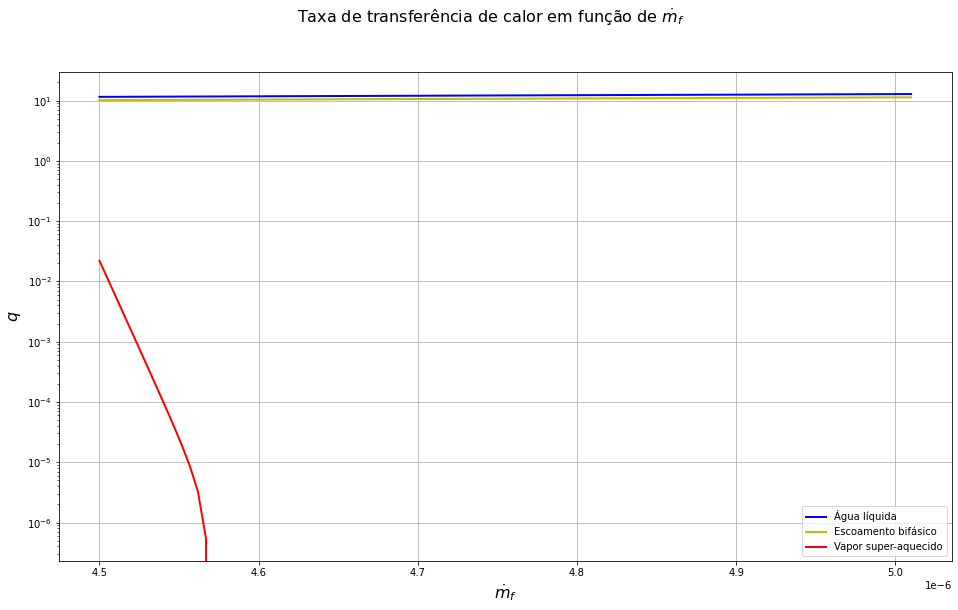

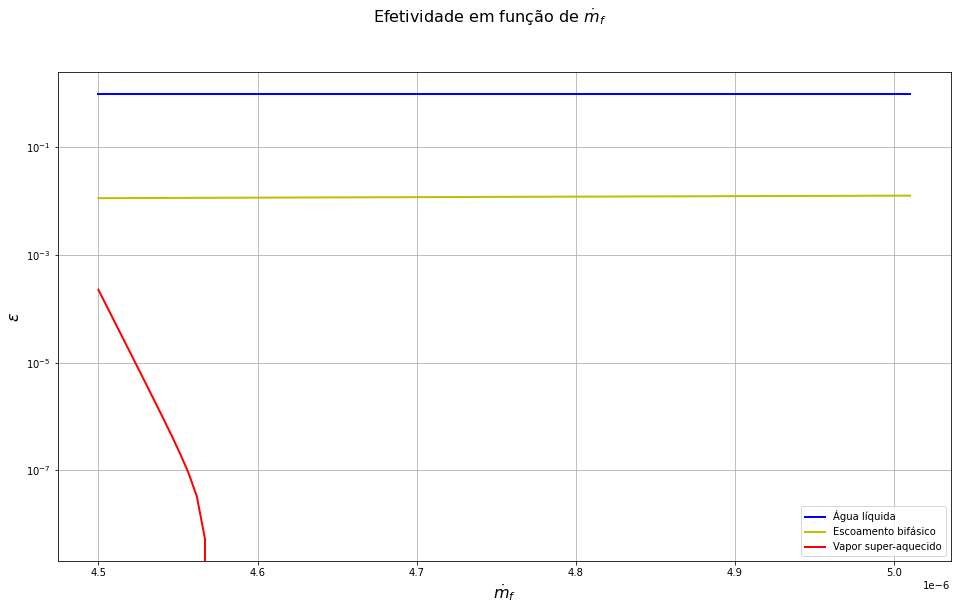

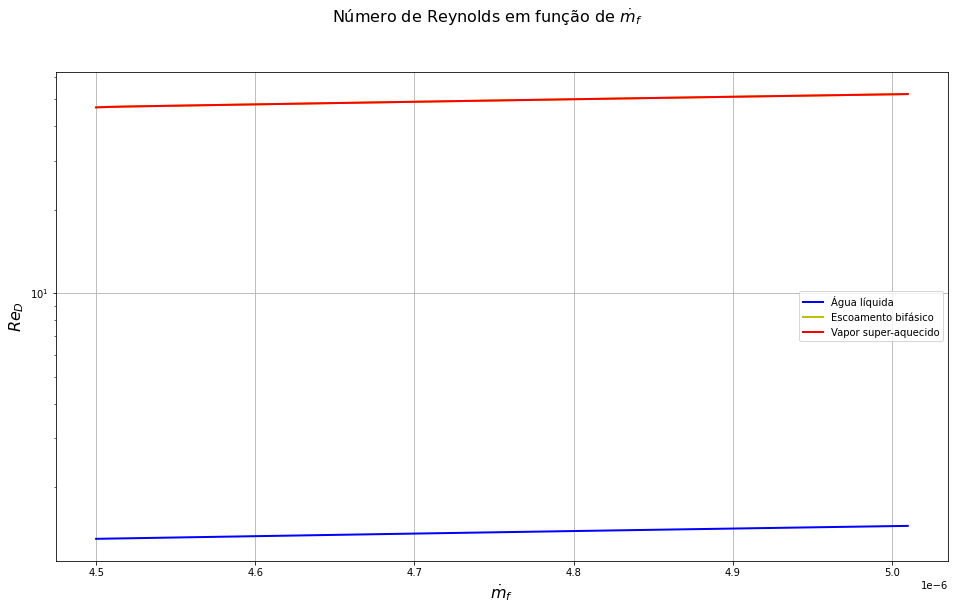

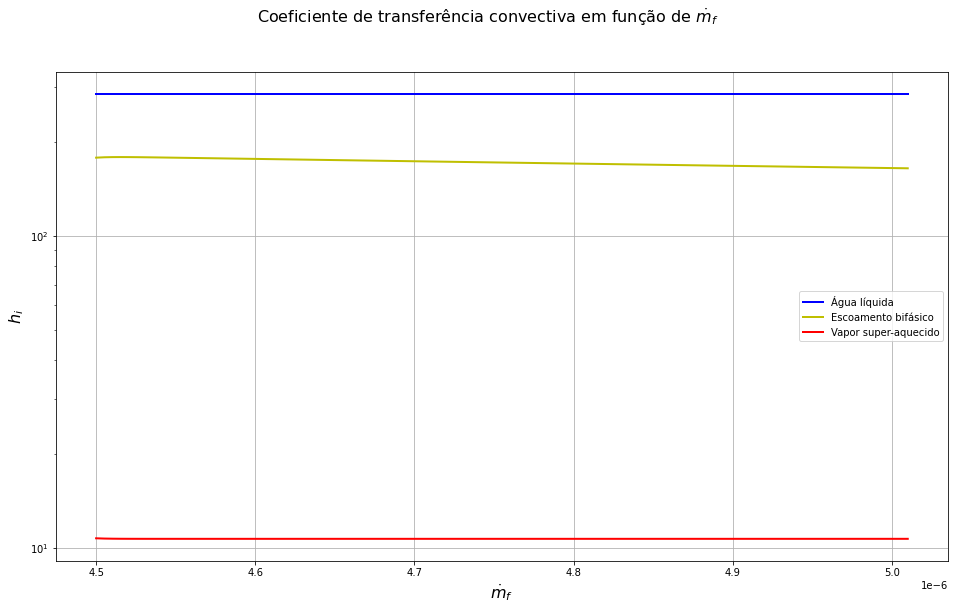

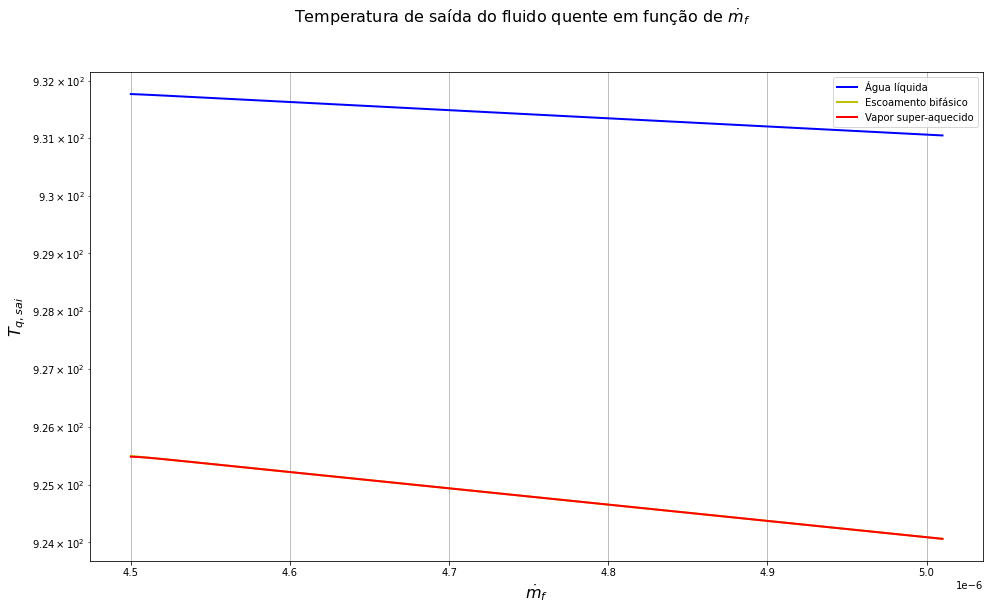

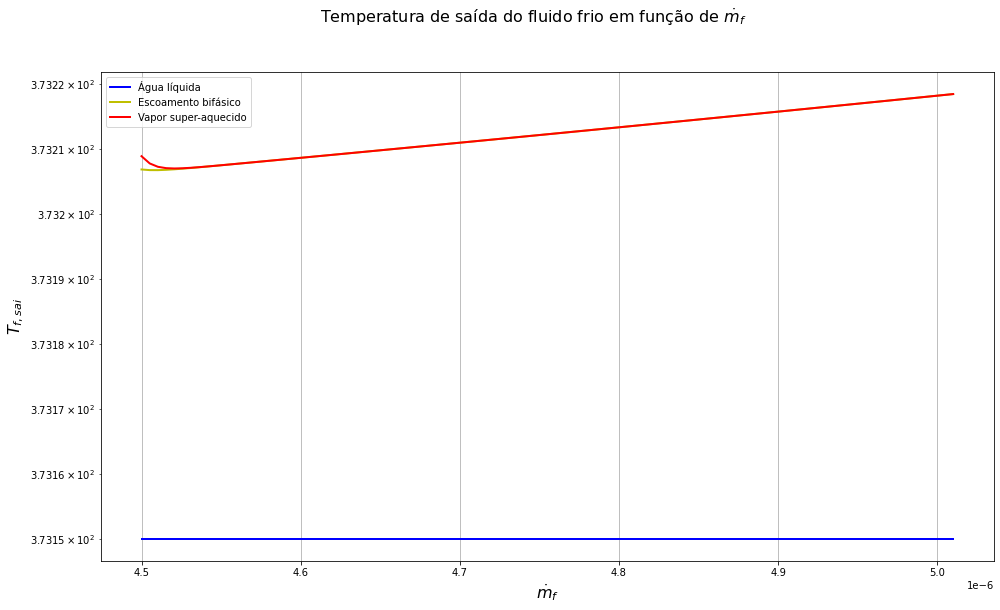

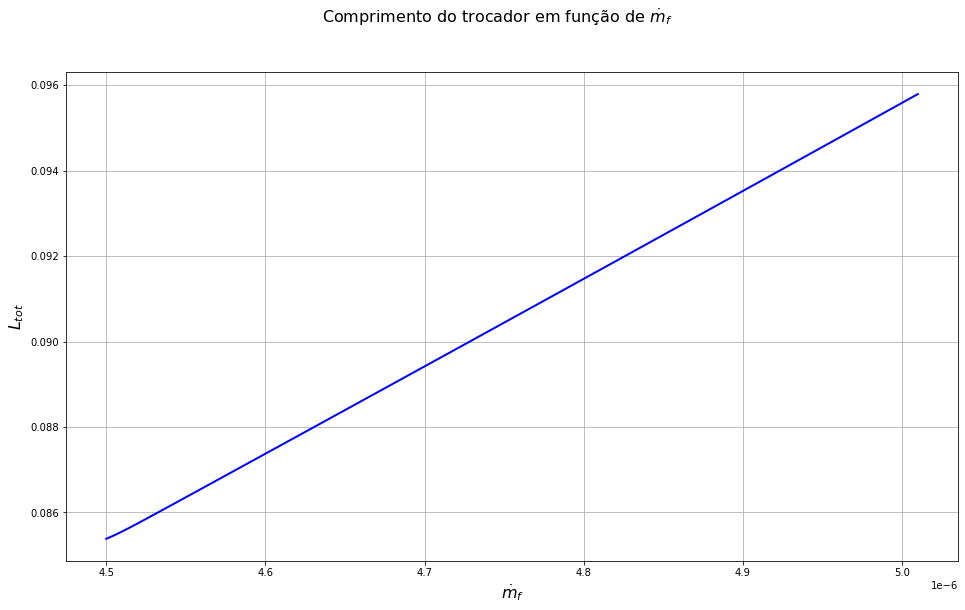

In [199]:
"############### Análise geral ##############"

parameters = parameters_4.keys()

zones = [
    parameters_4,
    parameters_5,
    parameters_6
]

z_names =[
    'Água líquida',
    'Escoamento bifásico',
    'Vapor super-aquecido'
]

colors = [
    'b',
    'y',
    'r'
]

names = [
    'Taxa de transferência de calor',
    'Efetividade',
    'Número de Reynolds',
    'Coeficiente de transferência convectiva',
    'Temperatura de saída do fluido quente',
    'Temperatura de saída do fluido frio',
    'Comprimento da zona'
]

symbols = [
    '$q$',
    '$\epsilon$',
    '$Re_D$',
    '$h_i$',
    '$T_{q,sai}$',
    '$T_{f,sai}$',
    '$L$'
]

for parameter, name , symbol in zip(parameters,names,symbols):

    fig = plt.figure(figsize=[16,9])

    fig.suptitle((name + ' em função de $\dot{m}_f$'), fontsize=16)

    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlabel('$\dot{m}_f$',fontsize=16)
    
    ax.set_ylabel(symbol,fontsize=16)

    plt.yscale("log")

    for zone,z_name,color in zip(zones,z_names,colors):

        ax.plot(m_dot_f_eval,zone[parameter],color, linewidth=2,label = z_name)

    ax.grid()

    ax.legend()

    plt.show()

    fig.savefig(name + '.png', bbox_inches='tight')

parameters_g = [
                [(L_4 + L_5 + L_6) for L_4,L_5,L_6 in zip(L_4_list,L_5_list,L_6_list)]]

names_g = [
    'Comprimento do trocador'
]

symbols_g = [
    '$L_{tot}$'
]

for parameter, name , symbol in zip(parameters_g,names_g,symbols_g):

    fig = plt.figure(figsize=[16,9])
    fig.suptitle((name + ' em função de $\dot{m}_f$'), fontsize=16)

    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlabel('$\dot{m}_f$',fontsize=16)
    ax.set_ylabel(symbol,fontsize=16)

    ax.plot(m_dot_f_eval,parameter,'b', linewidth=2)

    ax.grid()

    plt.show()
    fig.savefig(name + '__g__.png', bbox_inches='tight')

    del fig
    del ax
    plt.close()